In [78]:
import numpy as np
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt

# Zadanie 1

## Treść

Z populacji generalnej o rozkładzie normalnym N (μ, 0.2) pobrano próbę <i>(dane 1)</i>. Na poziomie istotności $\alpha = 0.05$ zweryfikuj hipotezy:
- $\mu = 1.5$,
- $\mu \gt 1.5$,
- $\mu \lt 1.5$.

Narysuj odpowiednie obszary kytyczne i wyznacz p-wartości dla każdej z powyższych hipotez.
Odpowiedz na pytanie co stanie się kiedy zwiększymy bądź zmniejszymy poziom ufności.

## Rozwiązanie

Rozpocznijmy od wczytania danych

In [79]:
data = np.loadtxt("lista8_zad1.txt")

Definiujemy parametry zadania 

In [80]:
mu_0 = 1.5
sigma = 0.2
alpha = 0.05

Rozpoczynamy od wyznaczenia danych próby

In [81]:
sample_mean = np.mean(data)
sample_size = len(data)

print("--------------------------")
print(f"Średnia próby: {sample_mean}")
print(f"n: {sample_size}")
print("--------------------------")
sample_mean, sample_size

--------------------------
Średnia próby: 1.45546595425
n: 1000
--------------------------


(1.45546595425, 1000)

Wyznaczamy wartość statystyki testowej ze wzoru:

$$
z = \frac{\bar{X} - \mu_0}{\sigma} \cdot  \sqrt{n}
$$

gdzie:
- $\bar{X}$ - średnia próby
- $\mu_0$ - wartość oczekiwana w hipotezie zerowej
- $\sigma$ - odchylenie standardowe populacji
- $n$ - liczebność próby

In [82]:
z = (sample_mean - mu_0) / (sigma / np.sqrt(sample_size))
z

-7.041450899607091

### 1) $H_1$

Teraz dla poziomu istotności $\alpha = 0.05$ (co oznacza, że akceptujemy maksymalne 5% ryzyko popełnienia błędu I rodzaju) obliczamy wartość krytyczną $z$.<br>

In [83]:
# Wartości krytyczne i wartości p
z_critical = norm.ppf(1 - alpha / 2)
p_value = 2 * (1 - norm.cdf(abs(z)))
z_critical, p_value

(1.959963984540054, 1.9024781749976682e-12)

Przedstawmy rezultaty na wykresie

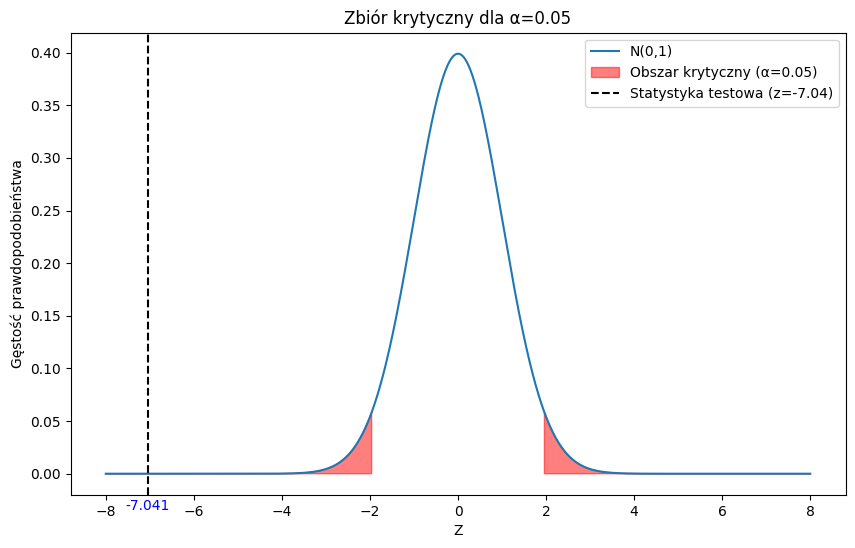

In [84]:
x = np.linspace(-8, 8, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Zbiór krytyczny dla α=0.05')

plt.show()

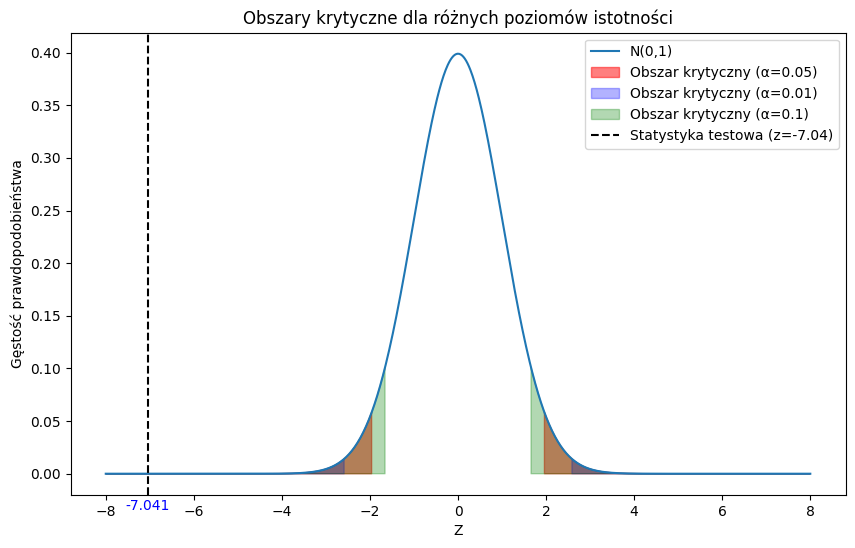

(1.45546595425,
 1000,
 -7.041450899607091,
 1.959963984540054,
 1.9024781749976682e-12,
 2.5758293035489004,
 1.9024781749976682e-12,
 1.6448536269514722,
 1.9024781749976682e-12)

In [85]:
# Dla alpha = 0.01
alpha_01 = 0.01
z_critical_01 = norm.ppf(1 - alpha_01/2)
p_value_01 = 2 * (1 - norm.cdf(abs(z)))

# Dla alpha = 0.1
alpha_1 = 0.1
z_critical_1 = norm.ppf(1 - alpha_1/2)
p_value_1 = 2 * (1 - norm.cdf(abs(z)))

x = np.linspace(-8, 8, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.fill_between(x, 0, y, where=(x <= -z_critical_01) | (x >= z_critical_01), color='blue', alpha=0.3, label='Obszar krytyczny (α=0.01)')
ax.fill_between(x, 0, y, where=(x <= -z_critical_1) | (x >= z_critical_1), color='green', alpha=0.3, label='Obszar krytyczny (α=0.1)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Obszary krytyczne dla różnych poziomów istotności')

plt.show()

sample_mean, sample_size, z, z_critical, p_value, z_critical_01, p_value_01, z_critical_1, p_value_1

### 2) $H_2$

In [86]:
alpha = 0.05
z_critical = norm.ppf(1 - alpha)
p_value = 1 - norm.cdf(z)
z_critical, p_value

(1.6448536269514722, 0.9999999999990488)

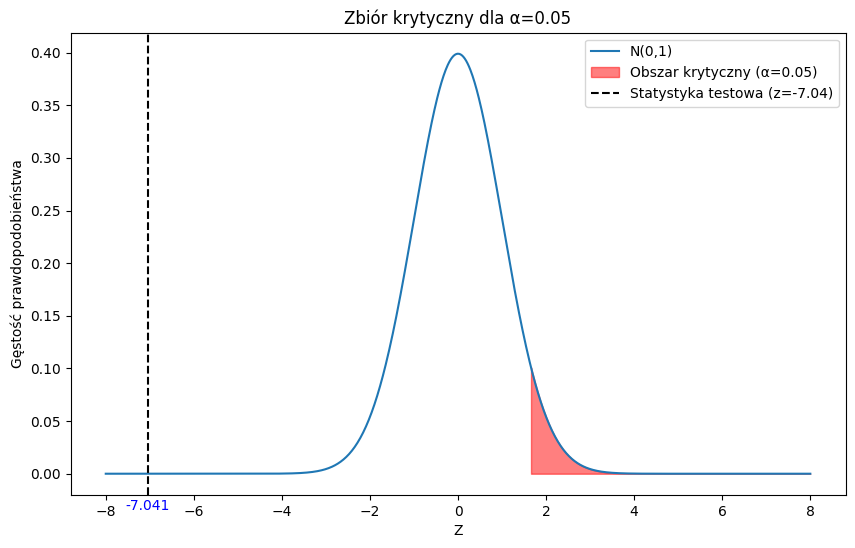

In [87]:
x = np.linspace(-8, 8, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Zbiór krytyczny dla α=0.05')

plt.show()

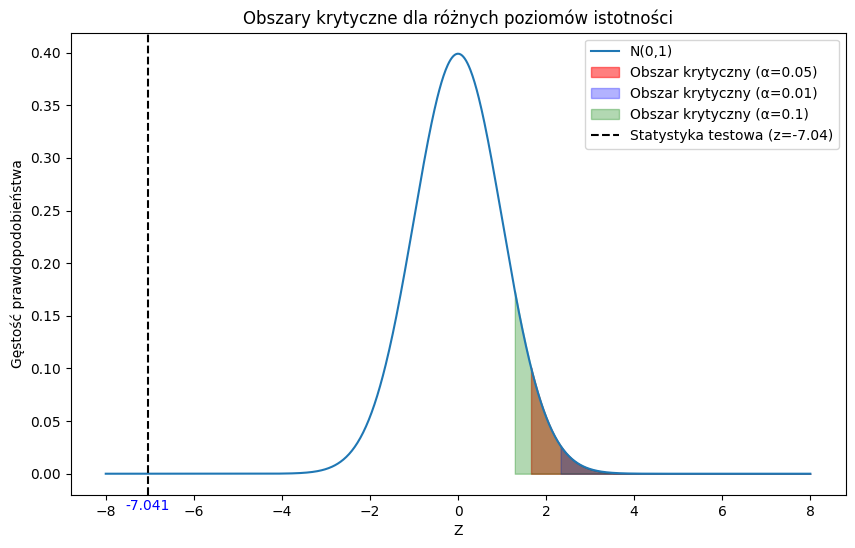

(1.45546595425,
 1000,
 -7.041450899607091,
 1.6448536269514722,
 0.9999999999990488,
 2.3263478740408408,
 0.9999999999990488,
 1.2815515655446004,
 0.9999999999990488)

In [88]:
# For alpha = 0.01
alpha_01 = 0.01
z_critical_01 = norm.ppf(1 - alpha_01)
p_value_01 = 1 - norm.cdf(z)

# For alpha = 0.1
alpha_1 = 0.1
z_critical_1 = norm.ppf(1 - alpha_1)
p_value_1 = 1 - norm.cdf(z)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.fill_between(x, 0, y, where=(x >= z_critical_01), color='blue', alpha=0.3, label='Obszar krytyczny (α=0.01)')
ax.fill_between(x, 0, y, where=(x >= z_critical_1), color='green', alpha=0.3, label='Obszar krytyczny (α=0.1)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'{z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Obszary krytyczne dla różnych poziomów istotności')

plt.show()
sample_mean, sample_size, z, z_critical, p_value, z_critical_01, p_value_01, z_critical_1, p_value_1

### 3) $H_3$

In [89]:
alpha = 0.05
z_critical = norm.ppf(alpha)
p_value = norm.cdf(z)
z_critical, p_value

(-1.6448536269514729, 9.51241291241344e-13)

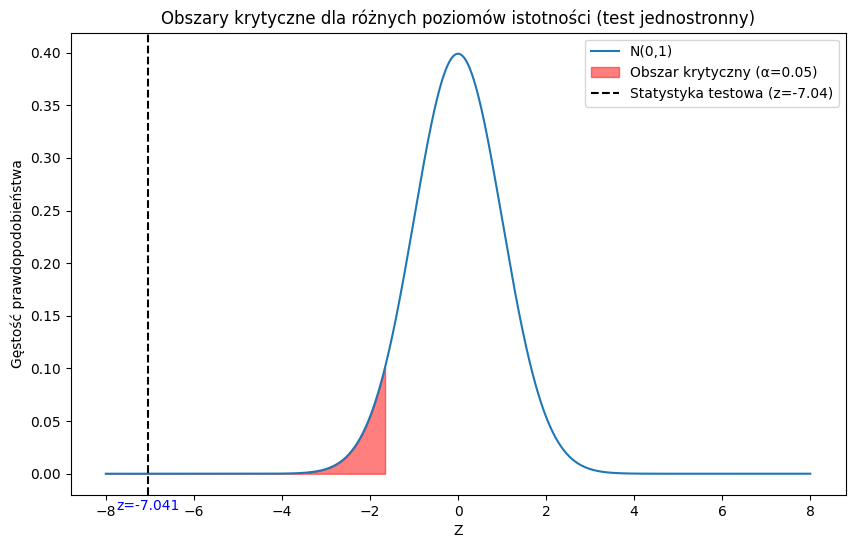

In [90]:
alpha_01 = 0.01
z_critical_01 = norm.ppf(alpha_01)
p_value_01 = norm.cdf(z)

x = np.linspace(-8, 8, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x <= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'z={z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())      #zobacz czy z tym
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Obszary krytyczne dla różnych poziomów istotności (test jednostronny)')

plt.show()

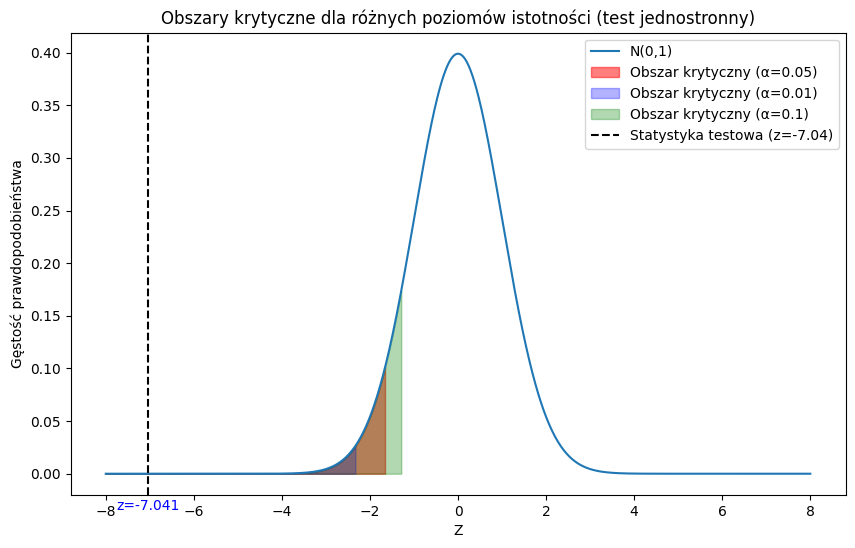

(1.45546595425,
 1000,
 -7.041450899607091,
 -1.6448536269514729,
 9.51241291241344e-13,
 -2.3263478740408408,
 9.51241291241344e-13,
 -1.2815515655446004,
 9.51241291241344e-13)

In [91]:
# For alpha = 0.1
alpha_1 = 0.1
z_critical_1 = norm.ppf(alpha_1)
p_value_1 = norm.cdf(z)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, label='N(0,1)')
ax.fill_between(x, 0, y, where=(x <= z_critical), color='red', alpha=0.5, label='Obszar krytyczny (α=0.05)')
ax.fill_between(x, 0, y, where=(x <= z_critical_01), color='blue', alpha=0.3, label='Obszar krytyczny (α=0.01)')
ax.fill_between(x, 0, y, where=(x <= z_critical_1), color='green', alpha=0.3, label='Obszar krytyczny (α=0.1)')
ax.axvline(x=z, color='black', linestyle='--', label=f'Statystyka testowa (z={z:.2f})')
ax.text(z, -0.01, f'z={z:.3f}', horizontalalignment='center', verticalalignment='top', color='blue', fontsize=10, transform=ax.get_xaxis_transform())
ax.legend()
ax.set_xlabel('Z')
ax.set_ylabel('Gęstość prawdopodobieństwa')
ax.set_title('Obszary krytyczne dla różnych poziomów istotności (test jednostronny)')

plt.show()

sample_mean, sample_size, z, z_critical, p_value, z_critical_01, p_value_01, z_critical_1, p_value_1

# Zadanie 2

## Treść

Z populacji generalnej o rozkładzie normalnym $N(0.2, \sigma^2)$ pobrano próbę <i>(dane 2)</i>. Na poziomie istotności $\alpha = 0.05$ zweryfikuj hipotezy:
- $\sigma^2 \ne 1.5$,
- $\sigma^2 \gt 1.5$,
- $\sigma^2 \lt 1.5$.

Narysuj odpowiednie obszary kytyczne i wyznacz p-wartości dla każdej z powyższych hipotez.
Odpowiedz na pytanie co stanie się kiedy zwiększymy bądź zmniejszymy poziom ufności.

## Rozwiązanie

Tutaj również rozpoczniemy od wczytania danych:

In [92]:
dane2 = np.loadtxt("lista8_zad2.txt")

I rozpoczynamy od wyznaczenia danych próby:

In [93]:
zad2_sample_size = len(data)
zad2_sample_mean = np.mean(data)
zad2_sample_variance = np.var(data, ddof=1)

print("--------------------------")
print(f"Wariancja próby: {zad2_sample_variance}")
print(f"Średnia próby: {zad2_sample_mean}")
print(f"n: {zad2_sample_size}")
print("--------------------------")

--------------------------
Wariancja próby: 0.039629236960963335
Średnia próby: 1.45546595425
n: 1000
--------------------------


Naszą hipotezą zerową $H_0$ dla każdego z tych przypadków będzie

$$
H_0 = 1.5
$$

In [94]:
zad2_h0 = 1.5

Wyznaczamy wartość statystyki testowej ze wzoru:

$$
\chi^2 = \frac{(n - 1) \cdot s^2}{\sigma_0^2}
$$

gdzie:
- $\chi^2$ - wartość statystyki chi-kwadrat
- $n$ - liczba obserwacji w próbie
- $s^2$ - wariancja próbki
- $\sigma_0^2$ - wartość wariancji w hipotezie zerowej

In [95]:
chi_squared_statistic = (zad2_sample_size - 1) * zad2_sample_variance / zad2_h0

Teraz dla poziomów istotności:
- $\alpha = 0.05$,
- $\alpha = 0.01$,
- $\alpha = 0.1$,

dokonamy weryfikacji hipotez $H_1$

# Od tego miejsca nie czytałem co gpt pisał jeszcze

In [96]:
alpha_05 = 0.05
alpha_01 = 0.01
alpha_1 = 0.1

critical_values_05_two_tailed = [chi2.ppf(alpha_05 / 2, zad2_sample_size - 1), chi2.ppf(1 - alpha_05 / 2, zad2_sample_size - 1)]
critical_values_01_two_tailed = [chi2.ppf(alpha_01 / 2, zad2_sample_size - 1), chi2.ppf(1 - alpha_01 / 2, zad2_sample_size - 1)]
critical_values_1_two_tailed = [chi2.ppf(alpha_1 / 2, zad2_sample_size - 1), chi2.ppf(1 - alpha_1 / 2, zad2_sample_size - 1)]

critical_value_05_greater = chi2.ppf(1 - alpha_05, zad2_sample_size - 1)
critical_value_01_greater = chi2.ppf(1 - alpha_01, zad2_sample_size - 1)
critical_value_1_greater = chi2.ppf(1 - alpha_1, zad2_sample_size - 1)

critical_value_05_less = chi2.ppf(alpha_05, zad2_sample_size - 1)
critical_value_01_less = chi2.ppf(alpha_01, zad2_sample_size - 1)
critical_value_1_less = chi2.ppf(alpha_1, zad2_sample_size - 1)


In [97]:
p_value_two_tailed = 2 * (1 - chi2.cdf(abs(chi_squared_statistic), zad2_sample_size - 1))
p_value_greater = 1 - chi2.cdf(chi_squared_statistic, zad2_sample_size - 1)
p_value_less = chi2.cdf(chi_squared_statistic, zad2_sample_size - 1)

I wyświetlmy wyniki

In [98]:
print(f"Statystyka testowa: χ² = {chi_squared_statistic:.2f}")
print(f"Obszary krytyczne dla α = 0.05 (dwustronny): {critical_values_05_two_tailed}")
print(f"Obszary krytyczne dla α = 0.01 (dwustronny): {critical_values_01_two_tailed}")
print(f"Obszary krytyczne dla α = 0.1 (dwustronny): {critical_values_1_two_tailed}")
print(f"Obszary krytyczne dla α = 0.05 (jednostronny, większy): {critical_value_05_greater}")
print(f"Obszary krytyczne dla α = 0.01 (jednostronny, większy): {critical_value_01_greater}")
print(f"Obszary krytyczne dla α = 0.1 (jednostronny, większy): {critical_value_1_greater}")
print(f"Obszary krytyczne dla α = 0.05 (jednostronny, mniejszy): {critical_value_05_less}")
print(f"Obszary krytyczne dla α = 0.01 (jednostronny, mniejszy): {critical_value_01_less}")
print(f"Obszary krytyczne dla α = 0.1 (jednostronny, mniejszy): {critical_value_1_less}")

print(f"Wartość p dla hipotezy dwustronnej: {p_value_two_tailed:.4f}")
print(f"Wartość p dla hipotezy jednostronnej (σ² > 1.5): {p_value_greater:.4f}")
print(f"Wartość p dla hipotezy jednostronnej (σ² < 1.5): {p_value_less:.4f}")

Statystyka testowa: χ² = 26.39
Obszary krytyczne dla α = 0.05 (dwustronny): [913.3009983021134, 1088.4870677259353]
Obszary krytyczne dla α = 0.01 (dwustronny): [887.6211352175186, 1117.890452678641]
Obszary krytyczne dla α = 0.1 (dwustronny): [926.6311609204329, 1073.6426506574246]
Obszary krytyczne dla α = 0.05 (jednostronny, większy): 1073.6426506574246
Obszary krytyczne dla α = 0.01 (jednostronny, większy): 1105.9169575045823
Obszary krytyczne dla α = 0.1 (jednostronny, większy): 1056.6952292962342
Obszary krytyczne dla α = 0.05 (jednostronny, mniejszy): 926.6311609204329
Obszary krytyczne dla α = 0.01 (jednostronny, mniejszy): 897.9644826908501
Obszary krytyczne dla α = 0.1 (jednostronny, mniejszy): 942.1612343926897
Wartość p dla hipotezy dwustronnej: 2.0000
Wartość p dla hipotezy jednostronnej (σ² > 1.5): 1.0000
Wartość p dla hipotezy jednostronnej (σ² < 1.5): 0.0000
